In [2]:
import fastf1
import matplotlib.pyplot as plt

In [ ]:
fastf1.Cache.enable_cache('cache')

In [ ]:
session = fastf1.get_session(2024, 'Brazil', 'R')
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16'

In [ ]:
driver = session.laps.pick_drivers('VER')

In [ ]:
lap = driver.pick_fastest()

In [ ]:
telemetry = lap.get_telemetry()

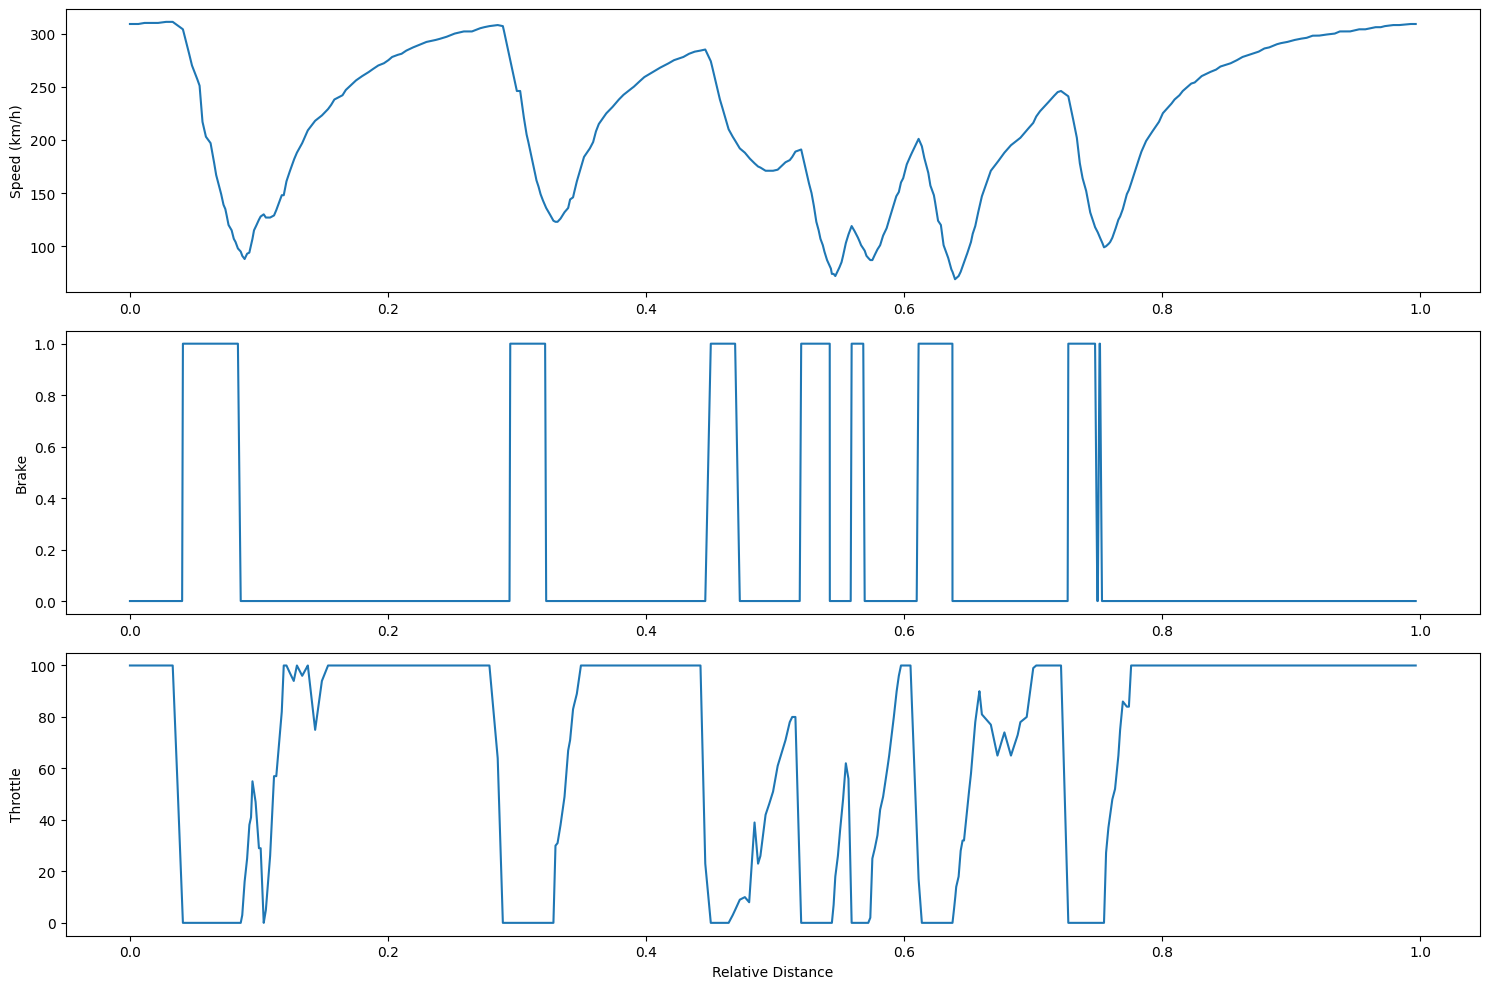

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

axs[0].plot(telemetry.RelativeDistance, telemetry.Speed)
axs[0].set_ylabel('Speed (km/h)')

axs[1].plot(telemetry.RelativeDistance, telemetry.Brake)
axs[1].set_ylabel('Brake')

axs[2].plot(telemetry.RelativeDistance, telemetry.Throttle)
axs[2].set_ylabel('Throttle')
axs[2].set_xlabel('Relative Distance')

plt.tight_layout()
plt.savefig('telemetry_sample.png', dpi=300)
plt.show()

In [10]:
print(telemetry.columns)

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')


In [20]:
    telemetry.to_csv('telemetry_VER_brazil_2024.csv', index=False)